# Chapter 03 회귀 알고리즘과 모델 규제

## 03-1 k-최근접 이웃 회귀

### k-최근접 이웃 회귀

지도 학습 알고리즘은 크게 **분류**와 **회귀**로 나뉜다.

- 분류 : 샘플을 몇 개의 클래스 중 하나로 분류하는 문제

- 회귀 : 클래스 중 하나로 분류하는 것이 아니라 임의의 어떤 숫자를 예측하는 문제

회귀의 예시) 내년도 경제 성장률 예측 등

k-최근접 이웃 알고리즘 또한 회귀에 작동한다.

**-> k-최근접 이웃 분류 알고리즘**

1. 예측하려는 샘플에 가장 가까운 샘플을 k개 선택한다.

2. 그다음 이 샘플들의 클래스를 확인하여 다수 클래스를 새로운 샘플의 클래스로 예측한다.

k = 3(샘플이 3개)라고 가정하면 사각형이 2개로 다수이기 때문에 새로운 샘플 x의 클래스는 사각형이 된다.

아래 그림 참조.

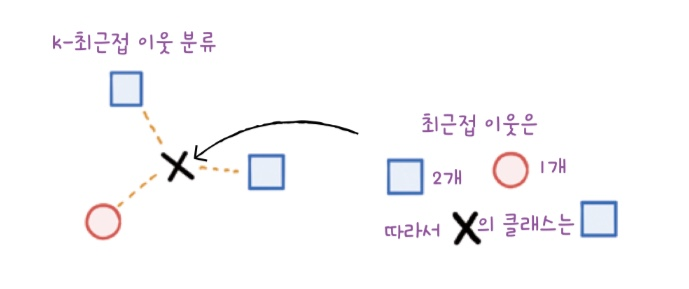

**-> k-최근접 이웃 회귀**

1. 분류와 똑같이 예측하려는 샘플에 가장 가까운 샘플 k개를 선택한다.

2. 이웃 샘플 수치들의 평균을 구한다.

그림에서 이웃한 샘플의 타깃값이 각각 100, 80, 60이고 이를 평균하면 샘플 x의 예측 타깃값은 80이 된다.

아래 그림 참조.

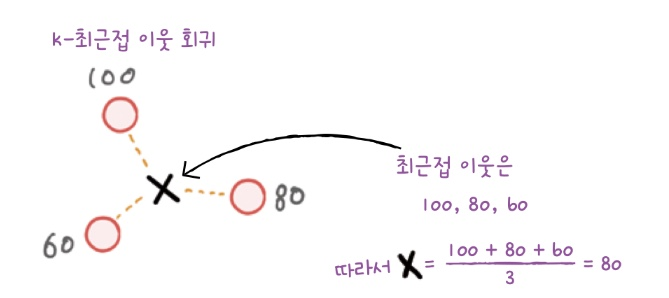

### 데이터 준비

In [2]:
import numpy as np

perch_length = np.array(
    [ 8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
    )

perch_weight = np.array(
    [   5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
    )

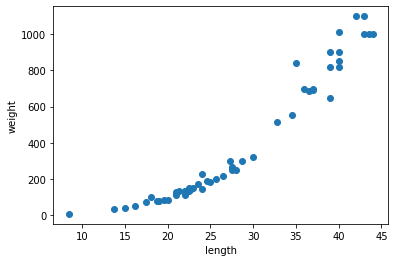

In [3]:
## 산점도 그리기
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 농어의 길이가 커짐에 따라 무게도 늘어난다.

In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

## 책과 동일한 결과를 도출하기위해 random_state=42로 지정

사이킷런의 train_test_split() 함수를 사용해 훈련 세트와 테스트 세트로 나눈다.

but, 사이킷런에 사용할 훈련 세트는 **2차원 배열**이어야 한다.

reshape() 메서드를 통해 2차원으로 바꿔보자.

In [5]:
## 1차원 배열
test_array = np.array([1, 2, 3, 4])
print(test_array.shape)

(4,)


In [6]:
## 2차원 배열로 변경
test_array = test_array.reshape(2, 2)
print(test_array.shape)

(2, 2)


reshape() 메서드를 사용하여 train_input과 test_input을 2차원 배열로 바꾸자.

train_input.reshape(-1, 1)처럼 사용하면 배열의 전체 원소 개수를 매번 외우지 않아도 2차원 배열로 바뀐다.

In [7]:
## test와 train 2차원 배열로 변경
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


### 결정계수(R^2)

사이킷런에서 k-최근접 이웃 회귀 알고리즘을 구현하는 클래스는 KNeighborsRegressor이다.

사용법은 KNeighborsClassifier와 매우 비슷하다.

객체를 생성하고 fit() 메서드로 회귀 모델을 훈련하자.

In [8]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

# k-최근접 이웃 회귀 모델을 훈련합니다.
knr.fit(train_input, train_target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [9]:
## 테스트 세트의 점수 확인
print(knr.score(test_input, test_target))

0.9928094061010639


위 점수는 결정계수(coefficient of determination), 즉 R^2이다.

**계산 방법**
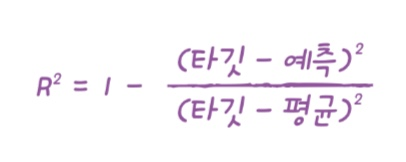

타킷의 평균 정도를 예측하는 수준이면 0에 가깝고,

타깃이 예측에 아주 가까워지면 1에 가까워진다.

0.99의 결과는 아주 좋은 값이지만 다른 값으로도 계산해 보자.

사이킷런은 sklearn.metrics 패키지 중 mean_absolute_error를 사용하자.

mean_absolute_error는 타깃과 예측의 절댓값 오차를 평균하여 반환한다.

In [10]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측을 만듭니다
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다.
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


결과를 통해 예측이 평균적으로 19g 정도 타깃값과 다르다는 것을 알 수 있다.

지금까지는 훈련 세트를 사용해 모델을 훈련하고 테스트 세트로 모델을 평가했다.

만약 훈련 세트를 사용해 평가하면 어떻게 될까?

### 과대적합 vs 과소적합

In [11]:
## 앞에서 훈련한 모델을 사용해 훈련 세트의 R^2 값을 확인
print(knr.score(train_input, train_target))

## 과소적합 발생
### 원인 : 훈련 세트와 테스트 세트의 크기가 매우 작기 때문

0.9698823289099255


훈련 모델을 사용해 R^2 값을 확인한 결과 0.96이 나왔다.

아까 테스트 모델을 사용했을 떄는 0.99였고 이보다 더 낮게 나온 것을 확인할 수 있다.

그런데 훈련 세트로 훈련을 했으므로 훈련 모델을 이용한 R^2 값이 더 높아야 한다.

**- 과대적합(overfitting)** : 훈련 세트에서 점수가 굉장히 좋았는데, 테스트 세트에서 점수가 굉장이 나쁜 경우

**- 과소적합(underfitting)** : 훈련 세트보다 테스트 세트의 점수가 높거나, 두 점수 모두 낮은 경우

위에서는 과소적합이 발생했다. 해결방법은 모델을 조금 더 복잡하게 만드는 것이다.

k-최근접 이웃 알고리즘으로 모델을 더 복잡하게 만드는 방법은 이웃의 개수 k 를 줄이는 것이다.

기본 k값은 5이므로, 3으로 낮추어보자.

In [12]:
# 이웃의 개수를 3으로 설정합니다
knr.n_neighbors = 3

# 모델을 다시 훈련합니다
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

## 아까보다 R^2 값이 높아진 것을 확인할 수 있다.

0.9804899950518966


In [13]:
print(knr.score(test_input, test_target))

0.974645996398761


테스트 세트의 점수는 훈련 세트보다 낮아졌으므로 과소적합 문제를 해결했다.

또한 두 점수의 차이가 크지 않으므로 과대적합도 아니다.

### 회귀 문제 다루기

**(1) k-최근접 이웃 회귀 모델**

1. 분류와 동일하게 가장 먼저 가까운 k개의 이웃을 찾는다.
2. 이웃 샘플의 타깃 값을 평균하여 이 샘플의 예측값으로 상용한다.

**(2) 사이킷런**

회귀 모델 점수로 R^2, 즉 결정계수 값을 반환한다. 이 값은 1에 가까울수록 좋다.

**(3) 모델 훈련 후**

훈련 세트와 테스트 세트에 대해 모두 평가 점수를 구할 수 있다.

두 점수 차이가 크면 좋지 않다. 일반적으로 훈련 세트의 점수가 조금 더 높다.

테스트 세트의 점수가 너무 낮다면 **과대 적합**

테스트 세트 점수가 너무 높거나, 두 점수 모두 낮으면 **과소 적합**

**if 과대적합**

모델을 덜 복잡하게 만들어야 한다. k-최근접 이웃의 경우 k 값을 늘린다.

**if 과소적합**

모델을 더 복잡하게 만들어야 한다. k-최근접 이웃의 경우 k 값을 줄인다.

## 03-2 선형 회귀

### k-최근접 이웃의 한계

In [14]:
import numpy as np

perch_length = np.array(
    [ 8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
    )

perch_weight = np.array(
    [   5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
    )

In [15]:
## 훈련 세트와 테스트 세트로 나누기
## 특성 데이터는 2차원 배열로 변환
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눕니다
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state = 42)

# 훈련 세트와 테스트 세트를 2차원 배열로 바꿉니다
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [16]:
## 최근접 이웃 개수를 3으로 하는 모델 훈련
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors = 3)

# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [17]:
## 이제 이 모델을 사용해 길이가 50cm인 농어의 무게를 예측
print(knr.predict([[50]]))

[1033.33333333]


무게를 1,033g 정도로 예측했다. 하지만 실제는 훨씬 더 많이 나간다. 무엇이 문제일까?

훈련 세트와 50cm의 종어 그리고 이 농어의 최근접 이웃을 산점도에 표시해보자.

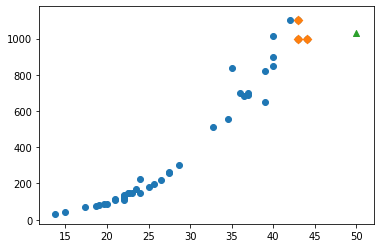

In [18]:
import matplotlib.pyplot as plt

# 50cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.show()

길이가 50cm이고, 무게가 1,033g인 농어는 초록색 삼각형으로 표시되고, 그 주변의 샘플은 주황색으로 표시된다.

위 산점도는 길이가 커질수록 농어의 무게가 증가한다.

하지만 50cm 농어에게 가장 가까운 것은 45cm 근방이다.

k-최근접 이웃은 주변 샘플들의 무게를 평균한다.

그러니까 이웃 샘플의 타깃의 평균을 구해보자.

In [19]:
print(np.mean(train_target[indexes]))

1033.3333333333333


모델이 예측했던 값과 일치한다.

k-최근접 이웃 회귀는 가장 가까운 샘플을 찾아 타깃을 평균한다.

따라서 새로운 샘플이 훈련 세트의 범위를 벗어나면 엉뚱한 값을 예측할 수 있다.

길이가 100cm인 농어도 1,033g으로 예측한다.

In [20]:
print(knr.predict([[100]]))

[1033.33333333]


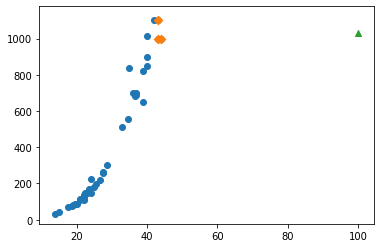

In [21]:
# 100cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 100cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.show()

이런 식이면 농어가 아무리 커도 무게가 더 늘어나지 않을 것이다.

k-최근접 이웃을 사용해 이 문제를 해결하려면 가장 큰 농어가 포한되도록 훈련 세트를 다시 만들어야 한다.

하지만 다른 방법을 찾아보자.

### 선형 회귀

**선형 회귀** : 특성이 하나인 경우 어떤 직선을 학습하는 알고리즘

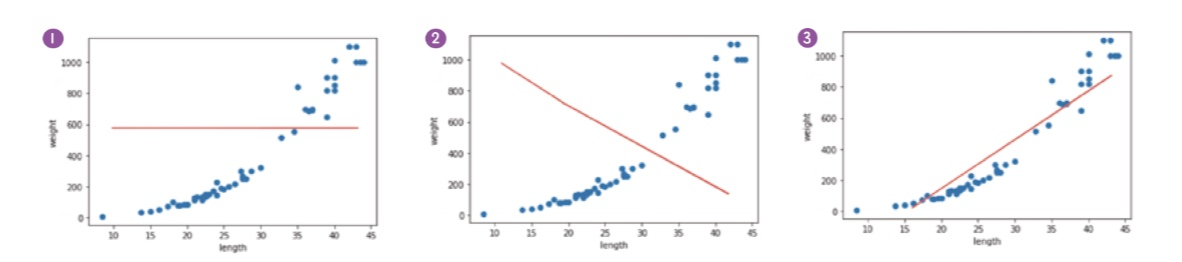

그래프 (1)은 모든 농어의 무게를 하나로 예측한다. 이 직선의 위치가 훈련 세트의 평균에 가깝다면 R^2는 0에 가까운 값이 된다.

그래프 (2)는 완전히 반대로 예측한다. 길이가 작은 농어의 무게가 높고 길이가 큰 농어의 무게가 낮다. 이렇게 반대로 예측하면 R^2의 값은 음수가 될 수 있다.

그래프 (3)이 가장 그럴싸한 직선이다. 이러한 직선을 머신러닝 알고리즘이 자동을 찾을 수 있다.

사이킷런 sklearn.linear_model 패키지 아래 LinearRegression 클래스로 선형 회귀 알고리즘을 구현한다.

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 선형 회귀 모델을 훈련합니다.
lr.fit(train_input, train_target)

# 50cm 농어에 대해 예측합니다.
print(lr.predict([[50]]))

[1241.83860323]


k-최근접 이웃 회귀를 사용했을 때와 달리 선형 회귀는 50cm 농어의 무게를 아주 높게 예측했다.

어떻게 이런 값이 나왔을까?

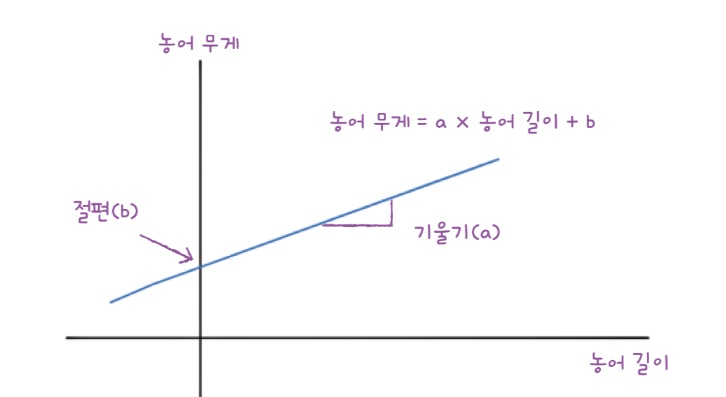

하나의 직선을 그리려면 기울기와 절편이 있어야 한다.

y = ax + b에서 x를 농어의 길이, y를 농어의 무게로 바꾸면 위 사진과 같다.

LinearRegression 클래스는 이 데이터에 가장 잘 맞는 a와 b를 찾았다.

이 클래스가 찾은 a와 b는 lr 객체의 coef_와 intercept_ 속성에 저장되어 있다.

In [23]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


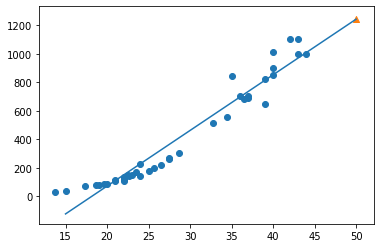

In [25]:
## 농어의 길이 15에서 50까지 직선으로 그리기
## 앞서 구한 기울기와 절편을 이용하여 (15, 15*39-709)와 (50, 50*39-709) 두 점 잇기

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프를 그립니다.
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.show()

위 그래프 직선이 선형 회귀 알고리즘이 찾은 최적의 직선이다.

길이가 50cm인 농어에 대한 예측은 직선의 연장선에 있다.

In [26]:
## R^2 값 확인
print(lr.score(train_input, train_target)) # 훈련 세트
print(lr.score(test_input, test_target)) # 테스트 세트

0.9398463339976041
0.8247503123313558


훈련 세트와 테스트 세트 점수차 발생 -> 그러면 과대적합?

사실 훈련 세트의 점수도 높지 않다 -> 그러면 과소적합?

전체적으로 과소적합되었다고 볼 수 있다.

그런데 그래프 왼쪽 아래를 보면 문제가 하나 더 있다.

### 다항 회귀

선형 회귀가 만든 직선이 왼쪽 아래로 쭉 뻗어 있다.

이 직선대로 예측하면 농어의 무게가 0g 이하로 내려간다.

농어의 길이와 무게에 대한 산점도를 보면 일직선이라기보다 왼쪽 위로 조금 구부러진 곡선에 가깝다.

그렇다면 최적의 직선을 찾기보다 최적의 곡선을 찾으면 어떨까?

-> 무게 = a * 길이^2 + b * 길이 + c

위 식처럼 2차 방정식의 그래프를 그리러면 길이를 제곱한 항이 훈련 세트에 추가되어야 한다.

column_stack() 함수를 사용해보자.

In [30]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [33]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


이제 train_poly를 이용해 선형 회귀 모델을 다시 훈련하자.

이 모델이 2차 방정식의 a, b, c를 찾을 것이다.

2차 방정식을 사용하기 위해 훈련 세트에 제곱합을 추가했지만, 타깃값은 그대로 사용한다.

In [34]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

## 아까보다 더 높은 값 예측

[1573.98423528]


In [35]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


이 모델은 다음과 같은 그래프를 학습했다.

**무게 = 1.01 x 길이^2 - 21.6 x 길이 + 116.05**

이런 방정식을 **다항식**이라고 하며 다항식을 사용한 선형 회귀를 **다항 회귀**라고 한다.

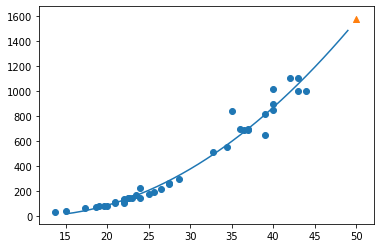

In [37]:
## 산점도 그리기

# 구간별 직선을 그리기 위해 15에서 49까지 점수 배열을 만듭니다.
point = np.arange(15, 50)

# 훈련 세트의 산점도를 그립니다.
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프를 그립니다
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm 농어 데이터
plt.scatter([50], [1574], marker='^')
plt.show()

In [38]:
## R^2 값 확인
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


테스트 세트의 점수가 조금 더 높다. -> 아직 과소적합이 남아있다.

### 선형 회귀로 훈련 세트 범위 밖의 샘플 예측

**k-최근접 이웃 회귀를 사용했을 때의 문제점**

- 훈련 세트 범위 밖의 샘플 예측x

- 아무리 멀리 떨어져 있어도 무조건 가장 가까운 샘플의 타깃을 평균하여 예측

위 문제 해결 방법은

**선형 회귀**

훈련 세트에 가장 잘 맞는 직선의 방정식 찾기

하지만 모델이 단순하다. 그래서

**다항 회귀**

농어의 길이를 제곱하여 훈련 세트에 추가한 다음 선형 회귀 모델을 다시 훈련했다.

2차 방정식의 그래프 형태로 학습하였고, 단순 선형 회귀보다 훈련 세트와 테스트 세트의 성능이 훨씬 높아졌다.

하지만 과소적합된 경향이 아직 남아있다.
